### importing data for prices and volume

##### for top 26 components of NIFITY 50(^NSEI)
'HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'INFY.NS', 'BHARTIARTL.NS',
'LT.NS', 'ITC.NS', 'AXISBANK.NS', 'KOTAKBANK.NS', 'MARICO.NS',
         'SBIN.NS', 'BAJAJFINSV.NS', 'M&M.NS', 'HINDUNILVR.NS', 'SUNPHARMA.NS',
         'HCLTECH.NS', 'MARUTI.NS', 'TITAN.NS', 'NTPC.NS', 'TATAMOTORS.NS',
         'SHRIRAMFIN.NS', 'NESTLEIND.NS', 'BRITANNIA.NS', 'ULTRACEMCO.NS', 'HDFCLIFE.NS', 'WIPRO.NS'

after importing data from yf i will calculate momentum, volatility, liquidity, ESG_SCORE

then i will calculate a weighted score that is like:
Weighted Score = 0.5 * Momentum + 0.3 * Volatility + 0.1 * ESG_Score + 0.1 * Liquidity (DEFINED BY ME)

then i will rank the stocks based on the weighted score

then generate a portfolio with top 10 stocks

future works:
A typical tracking universe will have about 150-200 stocks, but here i have taken only top 26 components
so for real life application of my strategy i may increase the tracking univerese size

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# took top 26 components of NIFITY 50(^NSEI)
stocks = ['AAPL']
start_date = '2023-04-01'
end_date = '2025-04-01'


lookback_months = 6           # used in momentum (parameter that determines how much historical data is used to calculate momentum.)
window_vol = 126              # approx 6 months for volatility
lookback_days_liquidity = 60  # for liquidity

data = yf.download(stocks, start=start_date, end=end_date)

data.head()

/tmp/ipython-input-2-3800445542.py:17: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stocks, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2023-04-03,164.295486,164.414128,162.367487,162.416926,56976200
2023-04-04,163.761612,164.957954,163.247474,164.720671,46278300
2023-04-05,161.912674,163.188130,159.974792,162.881630,51511700
2023-04-06,162.802536,163.099155,160.172539,160.597681,45390100
2023-04-10,160.202209,160.202209,158.274210,159.599090,47716900


[*********************100%***********************]  26 of 26 completed
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/SHRIRAMFIN.NS?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=SHRIRAMFIN.NS&crumb=XRDiUV%2FaZgE
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/BRITANNIA.NS?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=BRITANNIA.NS&crumb=XRDiUV%2FaZgE
404 Client Error: Not Found for url: https://query2.finance.yahoo.com/v10/finance/quoteSummary/HDFCLIFE.NS?modules=esgScores&corsDomain=finance.yahoo.com&formatted=false&symbol=HDFCLIFE.NS&crumb=XRDiUV%2FaZgE


Momentum Ranking (Highest to Lowest):
KOTAKBANK.NS: 0.1596
HDFCBANK.NS: 0.0431
ICICIBANK.NS: 0.0320
BHARTIARTL.NS: -0.0007
BAJAJFINSV.NS: -0.0017
WIPRO.NS: -0.0127
ULTRACEMCO.NS: -0.0370
SBIN.NS: -0.0388
MARICO.NS: -0.0539
LT.NS: -0.0576
HDFCLIFE.NS: -0.0609
SHRIRAMFIN.NS: -0.0836
SUNPHARMA.NS: -0.1045
HCLTECH.NS: -0.1106
AXISBANK.NS: -0.1344
MARUTI.NS: -0.1462
M&M.NS: -0.1627
RELIANCE.NS: -0.1645
INFY.NS: -0.1669
NTPC.NS: -0.1700
NESTLEIND.NS: -0.1750
TITAN.NS: -0.1974
ITC.NS: -0.2037
BRITANNIA.NS: -0.2125
HINDUNILVR.NS: -0.2355
TATAMOTORS.NS: -0.3208

Volatility Ranking (Highest to Lowest):
SHRIRAMFIN.NS: 0.3772
TATAMOTORS.NS: 0.3189
M&M.NS: 0.3143
WIPRO.NS: 0.2965
NTPC.NS: 0.2907
ULTRACEMCO.NS: 0.2742
BAJAJFINSV.NS: 0.2737
HCLTECH.NS: 0.2604
KOTAKBANK.NS: 0.2559
INFY.NS: 0.2525
LT.NS: 0.2524
HDFCLIFE.NS: 0.2456
MARICO.NS: 0.2413
BHARTIARTL.NS: 0.2408
TITAN.NS: 0.2299
ITC.NS: 0.2138
MARUTI.NS: 0.2138
SUNPHARMA.NS: 0.2129
SBIN.NS: 0.2112
AXISBANK.NS: 0.2051
RELIANCE.NS: 0.2028
NESTLEI

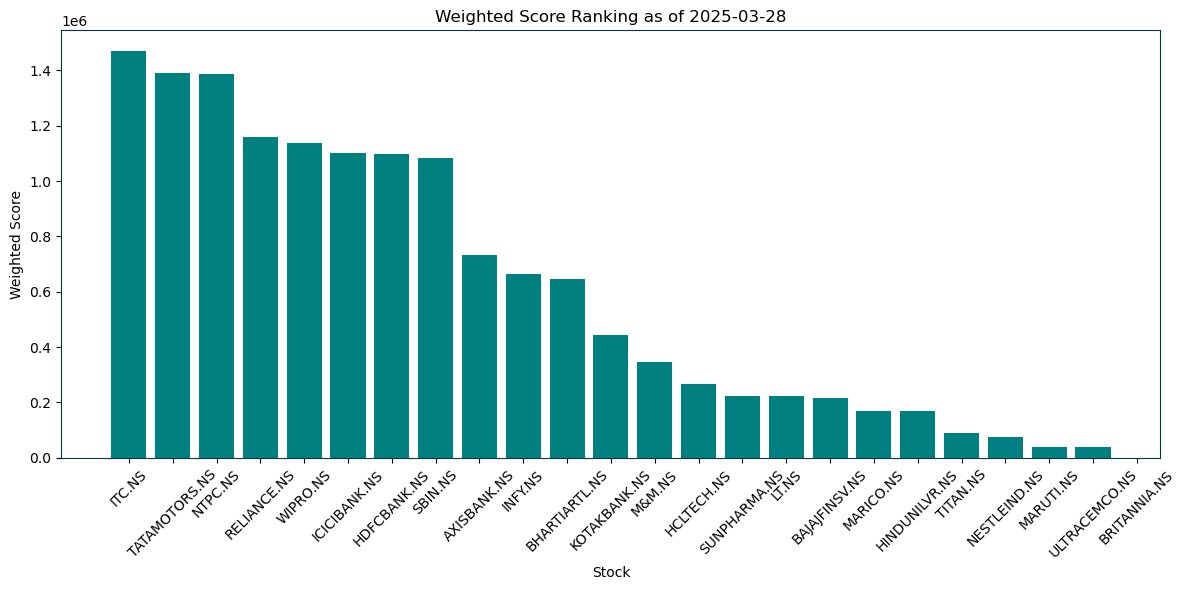

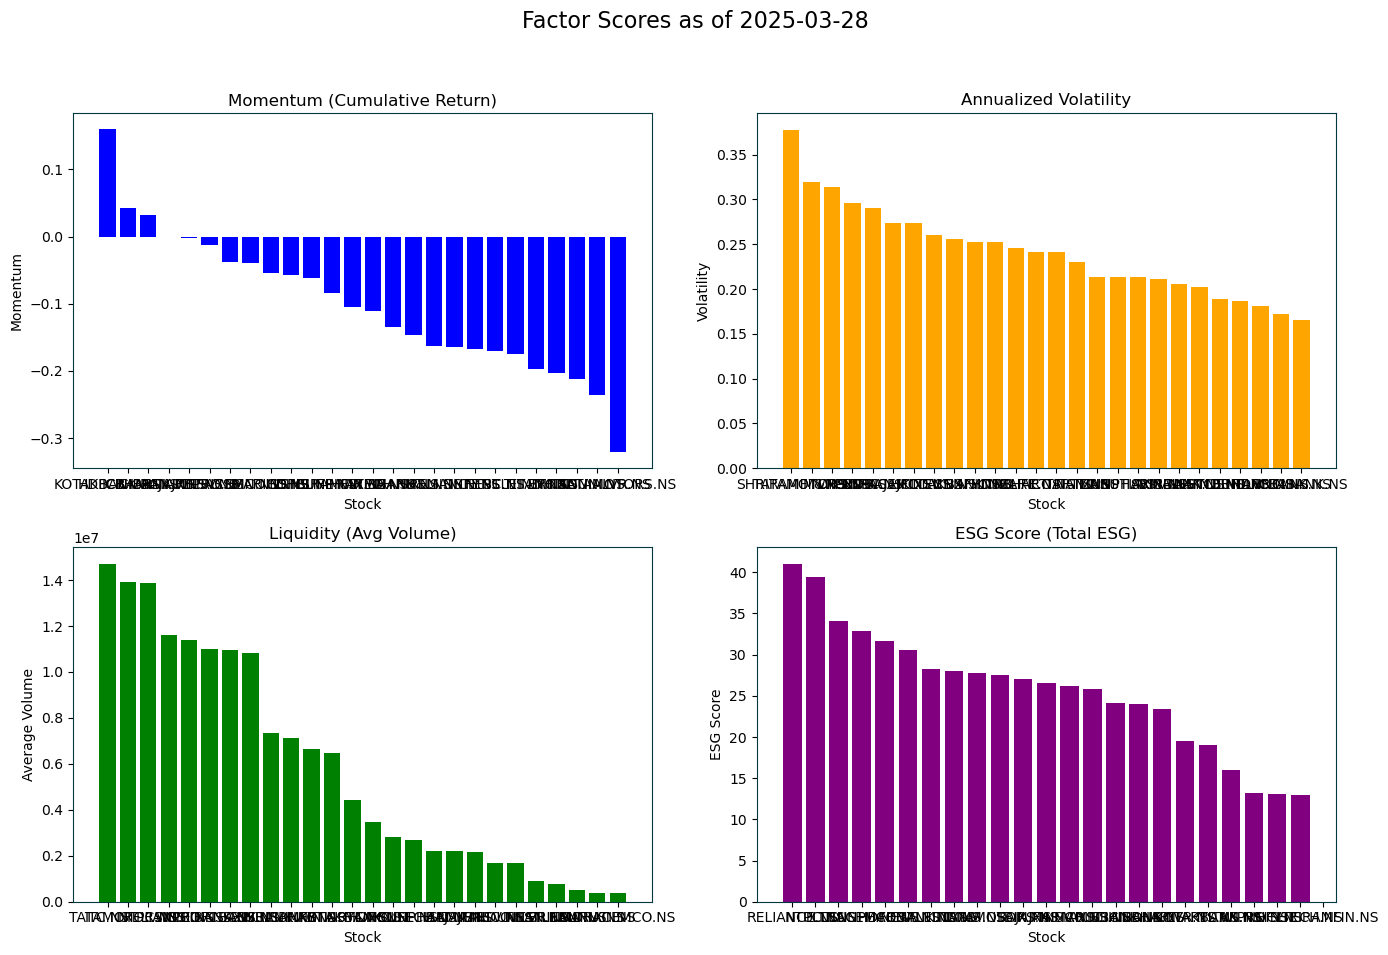

In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# took top 26 components of NIFITY 50(^NSEI)
stocks = ['HDFCBANK.NS', 'ICICIBANK.NS', 'RELIANCE.NS', 'INFY.NS', 'BHARTIARTL.NS',
         'LT.NS', 'ITC.NS', 'AXISBANK.NS', 'KOTAKBANK.NS', 'MARICO.NS',
         'SBIN.NS', 'BAJAJFINSV.NS', 'M&M.NS', 'HINDUNILVR.NS', 'SUNPHARMA.NS',
         'HCLTECH.NS', 'MARUTI.NS', 'TITAN.NS', 'NTPC.NS', 'TATAMOTORS.NS',
         'SHRIRAMFIN.NS', 'NESTLEIND.NS', 'BRITANNIA.NS', 'ULTRACEMCO.NS', 'HDFCLIFE.NS', 'WIPRO.NS']
start_date = '2023-04-01'
end_date = '2025-04-01'


lookback_months = 6           # used in momentum (parameter that determines how much historical data is used to calculate momentum.)
window_vol = 126              # approx 6 months for volatility
lookback_days_liquidity = 60  # for liquidity

data = yf.download(stocks, start=start_date, end=end_date)
prices = data['Close']
volume = data['Volume']
prices.ffill(inplace=True)

# returns momentum of a stock
def compute_momentum(prices, current_date, lookback_months=6):
    """
    Compute momentum as the cumulative return over the lookback period.
    """
    lookback_date = current_date - pd.DateOffset(months=lookback_months)
    if lookback_date < prices.index[0]:
        lookback_date = prices.index[0]
    idx = prices.index.get_indexer([lookback_date], method='nearest')[0]
    past_prices = prices.iloc[idx]
    current_prices = prices.loc[current_date]
    momentum = (current_prices - past_prices) / past_prices
    return momentum

# returns volatility
def compute_volatility(prices, current_date, window=126):
    """
    Compute annualized volatility based on daily returns over a given window (approx 6 months).
    Volatility = σ√T
    where:

    σ = standard deviation of returns
    T = number of periods in the time horizon
    """
    window_start = current_date - pd.Timedelta(days=window)
    data_window = prices.loc[prices.index >= window_start].loc[:current_date]
    daily_returns = data_window.pct_change().dropna()
    volatility = daily_returns.std() * np.sqrt(252)
    return volatility

# returns liquidity of a stock
def compute_liquidity(volume_data, current_date, lookback_days=60):
    """
    Compute liquidity as the average daily trading volume over the lookback period.
    """
    lookback_date = current_date - pd.Timedelta(days=lookback_days)
    liquidity = volume_data.loc[lookback_date:current_date].mean()
    return liquidity

# cal esg score
def get_esg_score(ticker):
    """
    Retrieve ESG score for a ticker using yfinance's sustainability data.
    Not all stocks provide ESG data; if unavailable, returns NaN.
    """
    try:
        t = yf.Ticker(ticker)
        sustainability = t.sustainability
        if sustainability is not None and not sustainability.empty:
            esg_score = sustainability.loc['totalEsg'].values[0]
        else:
            esg_score = np.nan
    except Exception as e:
        esg_score = np.nan
    return esg_score

current_date = volume.index[-1]

# now cal factors
momentum_scores = compute_momentum(prices, current_date, lookback_months=lookback_months)
volatility_scores = compute_volatility(prices, current_date, window=window_vol)
liquidity_scores = compute_liquidity(volume, current_date, lookback_days=lookback_days_liquidity)
esg_scores = {ticker: get_esg_score(ticker) for ticker in stocks}
esg_series = pd.Series(esg_scores)

print("Momentum Ranking (Highest to Lowest):")
momentum_sorted = momentum_scores.sort_values(ascending=False)
for stock, score in momentum_sorted.items():
    print(f"{stock}: {score:.4f}")

print("\nVolatility Ranking (Highest to Lowest):")
volatility_sorted = volatility_scores.sort_values(ascending=False)
for stock, score in volatility_sorted.items():
    print(f"{stock}: {score:.4f}")

print("\nLiquidity Ranking (Highest to Lowest):")
liquidity_sorted = liquidity_scores.sort_values(ascending=False)
for stock, score in liquidity_sorted.items():
    print(f"{stock}: {score:.0f}")

print("\nESG Ranking (Highest to Lowest):")
esg_sorted = esg_series.sort_values(ascending=False)
for stock, score in esg_sorted.items():
    print(f"{stock}: {score}")

# create a df of factors
factors_df = pd.DataFrame({
    'Momentum': momentum_scores,
    'Volatility': volatility_scores,
    'Liquidity': liquidity_scores,
    'ESG': esg_series
})

print(factors_df)

# Weighted Score = 0.5 * Momentum + 0.3 * Volatility + 0.1 * ESG_Score + 0.1 * Liquidity (DEFINED BY ME)
factors_df['Weighted Score'] = (
    0.5 * factors_df['Momentum'] +
    0.3 * factors_df['Volatility'] +
    0.1 * factors_df['ESG'] +
    0.1 * factors_df['Liquidity']
)

# CODE SELF SUFFICENT TO UNDERSTAND SO WON'T BE COMMENTING FURTHER FOR THIS CELL (LIKE PLOTING GRAPHS FOR ANALYSIS PURPOSE)
weighted_sorted = factors_df['Weighted Score'].sort_values(ascending=False)
print("\nRanking Based on Weighted Score (Highest to Lowest):")
for stock, score in weighted_sorted.items():
    print(f"{stock}: {score:.4f}")

plt.figure(figsize=(12, 6))
plt.bar(weighted_sorted.index, weighted_sorted.values, color='teal')
plt.title(f'Weighted Score Ranking as of {current_date.date()}')
plt.xlabel('Stock')
plt.ylabel('Weighted Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

fig, axs = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle(f'Factor Scores as of {current_date.date()}', fontsize=16)

momentum_sorted = momentum_sorted
axs[0, 0].bar(momentum_sorted.index, momentum_sorted.values, color='blue')
axs[0, 0].set_title('Momentum (Cumulative Return)')
axs[0, 0].set_xlabel('Stock')
axs[0, 0].set_ylabel('Momentum')

volatility_sorted = volatility_sorted
axs[0, 1].bar(volatility_sorted.index, volatility_sorted.values, color='orange')
axs[0, 1].set_title('Annualized Volatility')
axs[0, 1].set_xlabel('Stock')
axs[0, 1].set_ylabel('Volatility')

liquidity_sorted = liquidity_sorted
axs[1, 0].bar(liquidity_sorted.index, liquidity_sorted.values, color='green')
axs[1, 0].set_title('Liquidity (Avg Volume)')
axs[1, 0].set_xlabel('Stock')
axs[1, 0].set_ylabel('Average Volume')

esg_sorted = esg_sorted
axs[1, 1].bar(esg_sorted.index, esg_sorted.values, color='purple')
axs[1, 1].set_title('ESG Score (Total ESG)')
axs[1, 1].set_xlabel('Stock')
axs[1, 1].set_ylabel('ESG Score')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



In [ ]:
selected_stocks = weighted_sorted.head(10).index.tolist()

selected_stocks

['ITC.NS',
 'TATAMOTORS.NS',
 'NTPC.NS',
 'RELIANCE.NS',
 'WIPRO.NS',
 'ICICIBANK.NS',
 'HDFCBANK.NS',
 'SBIN.NS',
 'AXISBANK.NS',
 'INFY.NS']

## momentum > volatility > liquidity = esg score (weights of strategy)
50% from Momentum
30% from Volatility
10% from ESG
10% from Liquidity

# final companies for portfolio:
['ITC.NS',
 'TATAMOTORS.NS',
 'NTPC.NS',
 'RELIANCE.NS',
 'WIPRO.NS',
 'ICICIBANK.NS',
 'HDFCBANK.NS',
 'SBIN.NS',
 'AXISBANK.NS',
 'INFY.NS']ARTL.NS']

In [ ]:
# PARAMETERS & SETTINGS
initial_capital = 10000
transaction_cost = 0.001  # 0.1% per trade
lookback_months = 6
rebalance_freq = 'ME'  # Monthly rebalancing
risk_free_rate = 0.0   # Assuming zero risk free rate for Sharpe Ratio calculation

# Parameters
stocks = ['ITC.NS',
 'TATAMOTORS.NS',
 'NTPC.NS',
 'RELIANCE.NS',
 'WIPRO.NS',
 'ICICIBANK.NS',
 'HDFCBANK.NS',
 'SBIN.NS',
 'AXISBANK.NS',
 'INFY.NS']
start_date = '2023-04-01'
end_date = '2025-04-01'
lookback_days_liquidity = 60


prices = yf.download(stocks, start=start_date, end=end_date)['Close']
volume = yf.download(stocks, start=start_date, end=end_date)['Volume']
prices.ffill(inplace=True)
returns = prices.pct_change().dropna()

[*********************100%***********************]  10 of 10 completed
[*********************100%***********************]  10 of 10 completed


## Eigen Portfolio Strategy

Eigen Portfolios (PCA-driven weights from covariance matrix)
These portfolios are orthogonal and uncorrelated to the market in general thus yielding high reward and alpha. However, since they are uncorrelated to the market, they can also provide great risk

#### detailed explaination:
first comput cov matrix of assests returns, then eigenvales and eigenvectors for the cov matrix

Eigenvectors ) represent orthogonal directions of maximum varian

for weights/portfoloio const use eigenvectors
rem to normalize

#### why to use this (intutition behind these)

Risk Factor Isolation: Eigenvectors decompose portfolio risk into uncorrelated components.

Diversification: Orthogonal PCs minimize redundancy in risk exposure.

No Return Forecasts Needed: Purely risk-based, avoiding noisy return estima
tes.e.



In [ ]:
class EigenPortfolioStrategy:
    def __init__(self, is_long_only=True):
        self.is_long_only = is_long_only

    def generate_weights(self, symbols, covariance_matrix, eigen_portfolio_number=1):
        # Ensure covariance matrix is positive semi-definite
        covariance_matrix = covariance_matrix + 1e-6 * np.eye(covariance_matrix.shape[0])

        # Eigen decomposition
        eig_values, eig_vectors = np.linalg.eigh(covariance_matrix)

        # Get target eigenvector
        eigen_portfolio = eig_vectors[:, -eigen_portfolio_number]
        eigen_portfolio /= eigen_portfolio.sum()  # Normalize

        # Long-only constraint
        if self.is_long_only:
            eigen_portfolio = np.maximum(eigen_portfolio, 0)
            eigen_portfolio /= eigen_portfolio.sum()

        return {symbol: weight for symbol, weight in zip(symbols, eigen_portfolio)}

In [ ]:
covariance_matrix = returns.cov().values
eigen_portfolio_number = 1
strategy = EigenPortfolioStrategy()
strategy.generate_weights(stocks, covariance_matrix, eigen_portfolio_number)

print("Portfolio Weights (Normalize): ")
for stock, weight in strategy.generate_weights(stocks, covariance_matrix, eigen_portfolio_number).items():
    print(f"{stock}: {weight: .4f}")

Portfolio Weights (Normalize): 
ITC.NS:  0.0990
TATAMOTORS.NS:  0.0741
NTPC.NS:  0.0776
RELIANCE.NS:  0.0675
WIPRO.NS:  0.0509
ICICIBANK.NS:  0.1591
HDFCBANK.NS:  0.1005
SBIN.NS:  0.1375
AXISBANK.NS:  0.1286
INFY.NS:  0.1052


## Minimum variance strategy

MVP tries to minimize the variance of the portfolio. These portfolios are lowest risk and reward.

#### detailed explianation

this strategy was made with a sole purpose of risk minimization, without requiring estimates of expected returns

first cal variance then optimize it to find min of it (simple!!!)

#### intution

already discussed to minimize risk

#### most imp point

Historically, MVP often outperforms in bear markets but may lag in bull markets
w






In [ ]:
import os
import random
import warnings
warnings.filterwarnings("ignore")

class MinimumVarianceStrategy:
	def __init__(self):
		print("Minimum Variance strategy has been created")

	def generate_portfolio(self, symbols, covariance_matrix):
		inverse_cov_matrix = np.linalg.pinv(covariance_matrix)
		ones = np.ones(len(inverse_cov_matrix))
		inverse_dot_ones = np.dot(inverse_cov_matrix, ones)
		min_var_weights = inverse_dot_ones / np.dot( inverse_dot_ones, ones)
		portfolio_weights_dictionary = dict([(symbols[x], min_var_weights[x]) for x in range(0, len(min_var_weights))])
		return portfolio_weights_dictionary

In [ ]:
# Updated implementation
covariance_matrix = returns.cov().values
strategy = MinimumVarianceStrategy()
portfolio_weights = strategy.generate_portfolio(stocks, covariance_matrix)

print("Portfolio Weights:")
for stock, weight in portfolio_weights.items():
    print(f"{stock}: {weight:.4f}")

Minimum Variance strategy has been created
Portfolio Weights:
ITC.NS: 0.0348
TATAMOTORS.NS: 0.1967
NTPC.NS: 0.2073
RELIANCE.NS: 0.1610
WIPRO.NS: 0.2744
ICICIBANK.NS: -0.0096
HDFCBANK.NS: 0.1002
SBIN.NS: -0.0248
AXISBANK.NS: 0.0647
INFY.NS: -0.0047


### For this backtesting we will be using Eigen Portfolio Strategy for weights allocations

i have backtested the portfolio only for eigen portfolio strategy because it is a risky stratetgy (unlike MVP that is a low risk and low reward but a consistent strtegy)

you can change few lines of code if you wnat to backtest using MVP

there are few things i haven't done
firstly you can scale the benchmark value to 10000 (which is currently at its original price in the graphs)
secondly you can Rebalance the portfolio at a regular frequency for quaterly i have done it only for monthly
and then you can get more results (since the scope of the task in my opnion was not to tackle every possible sceneario and do the analysis but to focus on a particular parameter and get results for it which i have done
sorry if i interpreted it wrongly)

### Evaluation Metrices
here i have used bunch of parameters for evaluation

#### my fav one (omega ratio)
Probability-weighted ratio of gains to losses
since this was a quant club task so using a parameter used in quant strategy looks cool!!!

#### Sharpe Ratio
measures how much excess return you receive for the extra volatility you endure by holding a riskier asset

#### future work for sharpe ratio
optimizing sharpe ratio by using mean-variance optimization

#### Sortino Ratio
Measures risk-adjusted return focusing on downside volatility

#### Value at Risk (VaR)
Worst expected loss at specific confidence level

#### Conditional VaR (CVaR)
Average loss beyond VaR

#### total returns
gives total returns

#### max Drawdown
measures the worst possible loss an investor could have experienced if they bought at the peak and sold at the trough(bottom)



In [ ]:
def backtest_portfolio(prices, weights_function, rebalance_freq='M', transaction_cost=0.001):
    portfolio_value = [10000]  # Initial capital
    dates = pd.date_range(start=prices.index[0], end=prices.index[-1], freq=rebalance_freq)

    current_weights = None
    for i, date in enumerate(dates):
        # Get lookback data (exclude future data)
        lookback_data = prices[prices.index <= date]
        if len(lookback_data) < 60: continue

        # Calculate covariance matrix
        returns = lookback_data.pct_change().dropna().iloc[-63:-1]
        cov_matrix = returns.cov().values

        # Generate new weights
        new_weights = weights_function(cov_matrix)

        # Calculate transaction cost
        if current_weights is not None:
            turnover = sum(abs(new_weights[s] - current_weights[s]) for s in new_weights)
            portfolio_value[-1] *= (1 - transaction_cost * turnover)

        # Update holdings
        current_weights = new_weights

        # Calculate returns until next rebalance
        next_date = dates[i+1] if i < len(dates)-1 else prices.index[-1]
        period_prices = prices.loc[date:next_date]
        for idx in range(1, len(period_prices)):
            daily_returns = period_prices.iloc[idx] / period_prices.iloc[idx-1] - 1
            portfolio_value.append(
                portfolio_value[-1] * (1 + sum(current_weights[s] * daily_returns[s] for s in current_weights))
            )

    return pd.Series(portfolio_value, index=prices.index[:len(portfolio_value)])

In [ ]:
selected_stocks = weighted_sorted.head(10).index.tolist()

# strategy
strategy = EigenPortfolioStrategy(is_long_only=True)

# define weights
def get_weights(cov_matrix):
    return strategy.generate_weights(selected_stocks, cov_matrix, eigen_portfolio_number=1)

# Run backtest
portfolio_values = backtest_portfolio(
    prices[selected_stocks],
    weights_function=get_weights,
    rebalance_freq='ME',
    transaction_cost=0.001
)

# Calculate metrics
returns = portfolio_values.pct_change().dropna()
sharpe_ratio = returns.mean() / returns.std() * np.sqrt(252)
max_drawdown = (portfolio_values / portfolio_values.cummax() - 1).min()

def sortino_ratio(returns, risk_free=0):
    downside_returns = returns[returns < risk_free]
    downside_dev = np.std(downside_returns) * np.sqrt(252)
    return (returns.mean()*252 - risk_free) / downside_dev

def historical_var(returns, confidence=0.95):
    return np.percentile(returns, 100*(1-confidence))

def cvar(returns, confidence=0.95):
    var = historical_var(returns, confidence)
    return returns[returns <= var].mean()

def omega_ratio(returns, risk_free=0, threshold=0):
    excess = returns - risk_free - threshold
    up = excess[excess > 0].sum()
    down = -excess[excess < 0].sum()
    return up/down if down !=0 else np.nan


print(f"Sharpe Ratio: {sharpe_ratio:.2f}")
print(f"Max Drawdown: {max_drawdown:.2%}")
print(f"Total Return: {(portfolio_values[-1]/10000-1):.2%}")
print(f"Sortino Ratio: {sortino_ratio(returns, risk_free=0):.2f}")
print(f"Value at Risk (VaR): {historical_var(returns):.2f}%")
print(f"Omega Ratio: {omega_ratio(returns):.2f}")
print(f"Conditional VaR (CVaR): {cvar(returns):.2f}%")


Sharpe Ratio: 0.96
Max Drawdown: -17.96%
Total Return: 26.90%
Sortino Ratio: 1.18
Value at Risk (VaR): -0.01%
Omega Ratio: 1.19
Conditional VaR (CVaR): -0.02%


## plots for backtest

### equity curve
The equity curve is a fundamental visualization tool in portfolio backtesting and performance analysis
Interpretation

####
Portfolio (Blue Line)


Starts at $10,000 (initial capit
ends at 26.09% moreQ3####  2022

Benchmark (Gray Dash
d Line):

Represents market index (e.g.

#### other two graphs are i think self explainatory
otal return)


[*********************100%***********************]  1 of 1 completed


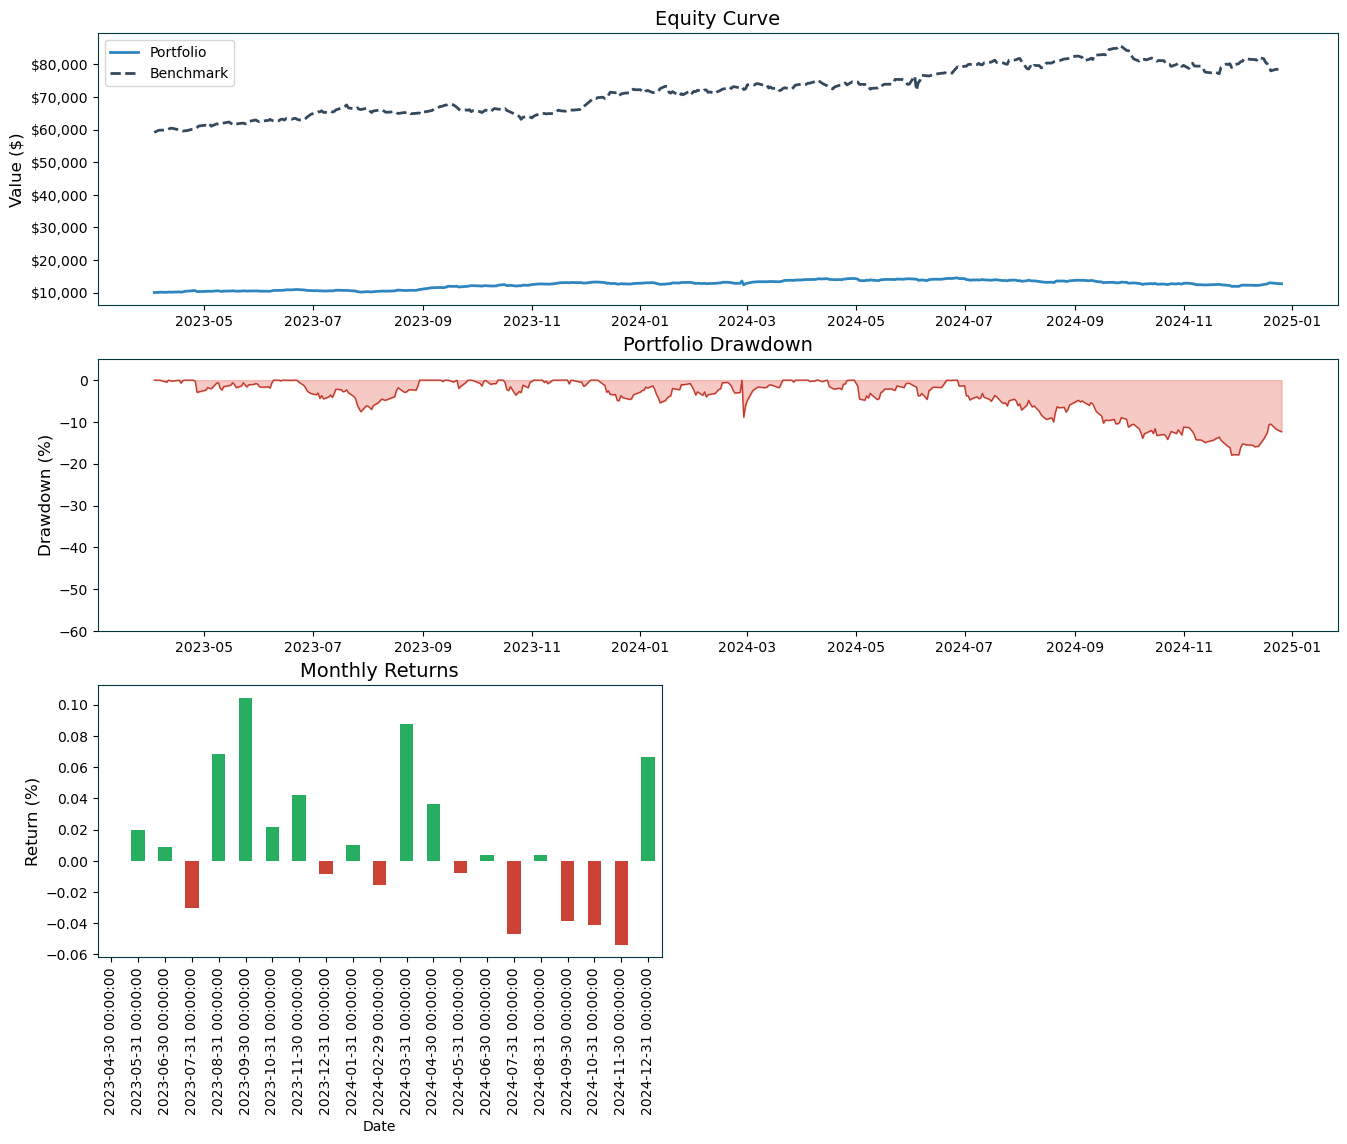

In [ ]:
def plot_backtest_results(portfolio_values, benchmark_prices, transactions=None):
    # plt.style.use('seaborn-darkgrid')

    # Convert to returns
    portfolio_returns = portfolio_values.pct_change().dropna()
    benchmark_returns = benchmark_prices.pct_change().dropna()

    # Create figure
    fig = plt.figure(figsize=(16, 12))
    gs = fig.add_gridspec(3, 2)

    # Equity Curve
    ax1 = fig.add_subplot(gs[0, :])
    ax1.plot(portfolio_values, label='Portfolio', lw=2, color='#2E86C1')
    ax1.plot(benchmark_prices, label='Benchmark', lw=2, color='#34495E', ls='--')
    ax1.set_title('Equity Curve', fontsize=14)
    ax1.set_ylabel('Value ($)', fontsize=12)
    ax1.legend()
    ax1.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'${x:,.0f}'))

    # Drawdown
    ax2 = fig.add_subplot(gs[1, :])
    rolling_max = portfolio_values.cummax()
    drawdown = (portfolio_values - rolling_max) / rolling_max
    ax2.fill_between(drawdown.index, drawdown*100, 0, color='#E74C3C', alpha=0.3)
    ax2.plot(drawdown*100, color='#C0392B', lw=1)
    ax2.set_title('Portfolio Drawdown', fontsize=14)
    ax2.set_ylabel('Drawdown (%)', fontsize=12)
    ax2.set_ylim(-60, 5)

    # Monthly Returns
    ax3 = fig.add_subplot(gs[2, 0])
    monthly_returns = portfolio_values.resample('M').last().pct_change()
    monthly_returns.plot(kind='bar', ax=ax3, color=np.where(monthly_returns >= 0, '#27AE60', '#CB4335'))
    ax3.set_title('Monthly Returns', fontsize=14)
    ax3.set_ylabel('Return (%)', fontsize=12)

# Run backtest and plot
benchmark = yf.download('^BSESN', start=start_date, end=end_date)['Close']  # Nifty 50 as benchmark
portfolio_values = backtest_portfolio(
    prices[selected_stocks],
    weights_function=get_weights,
    rebalance_freq='ME',
    transaction_cost=0.001
)  # From previous implementation

plot_backtest_results(
    portfolio_values=portfolio_values,
    benchmark_prices=benchmark.reindex(portfolio_values.index).ffill()
)